In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#Import data 
df= pd.read_csv('DIGITAL COMPETITIVENESS-PCA.csv')
df.head()

,Foreign highly skilled personnel,Total expenditure on R&D (%),Scientific research legislation,Mobile broadband subscribers,EParticipation,Use of big data and analytics,Total public exp. on education per student,Health infrastructure,Skilled labor,Gross Domestic Product (GDP),GDP (PPP) per capita,Exports of goods growth,Government budget surplus/deficit (%),Tax evasion,Digital/Technological skills
0,0.524565,-0.561194,1.083241,1.023039,0.713693,1.130545,2.309253,0.738516,-0.013831,0.082300,0.390093,1.715123,-0.836902,1.102487,0.708586
1,0.354150,-0.541294,0.672756,1.443617,0.921162,0.866252,2.472463,0.261484,0.631120,0.136074,0.745904,0.008031,-0.303620,0.183795,0.238094
2,0.148233,-0.541294,0.561211,1.245545,0.190871,0.933731,3.048471,0.308834,0.735355,0.214946,0.589874,-0.227806,-0.482678,-0.823681,-0.076660
3,-0.514489,-0.551244,0.070413,1.245545,0.190871,-0.069081,3.048471,-0.333569,-1.140867,0.238140,1.096699,-1.107370,-0.521604,-1.202186,-0.709447
4,-0.563009,-0.511443,0.087145,1.245545,0.049793,0.084621,2.777281,-1.098940,0.526886,0.179376,0.964937,-0.143878,-0.397042,-1.118074,-0.114365


In [3]:
print(df.columns)

Index(['Foreign highly skilled personnel ', 'Total expenditure on R&D (%) ',
       'Scientific research legislation ', 'Mobile broadband subscribers ',
       'EParticipation ', 'Use of big data and analytics ',
       'Total public exp. on education per student ', 'Health infrastructure ',
       'Skilled labor ', 'Gross Domestic Product (GDP) ',
       'GDP (PPP) per capita ', 'Exports of goods  growth ',
       'Government budget surplus/deficit (%) ', 'Tax evasion ',
       'Digital/Technological skills'],
      dtype='object')


In [4]:
df.shape

(1259, 15)

In [4]:
#Create column for new target variable
# Use Digital/Technological skills Index column above the 80th percentile as well performing

# Calculate the 80th percentile
percentile_80 = df['Digital/Technological skills'].quantile(0.8)

#Create new column (Digital skills Performance) using 80th percentile
#Note:Values above 80th percentile (considered good performance) are allocated a value of 1. 
#Bad performance is assigned a value of 0.
df['Digital skills Performance'] = df['Digital/Technological skills'].apply(lambda x: 1 if x >= percentile_80 else 0)

#Drop 'Digital/Technological skills' column
df = df.drop('Digital/Technological skills', axis=1)

df.head()

,Foreign highly skilled personnel,Total expenditure on R&D (%),Scientific research legislation,Mobile broadband subscribers,EParticipation,Use of big data and analytics,Total public exp. on education per student,Health infrastructure,Skilled labor,Gross Domestic Product (GDP),GDP (PPP) per capita,Exports of goods growth,Government budget surplus/deficit (%),Tax evasion,Digital skills Performance
0,0.524565,-0.561194,1.083241,1.023039,0.713693,1.130545,2.309253,0.738516,-0.013831,0.082300,0.390093,1.715123,-0.836902,1.102487,1
1,0.354150,-0.541294,0.672756,1.443617,0.921162,0.866252,2.472463,0.261484,0.631120,0.136074,0.745904,0.008031,-0.303620,0.183795,0
2,0.148233,-0.541294,0.561211,1.245545,0.190871,0.933731,3.048471,0.308834,0.735355,0.214946,0.589874,-0.227806,-0.482678,-0.823681,0
3,-0.514489,-0.551244,0.070413,1.245545,0.190871,-0.069081,3.048471,-0.333569,-1.140867,0.238140,1.096699,-1.107370,-0.521604,-1.202186,0
4,-0.563009,-0.511443,0.087145,1.245545,0.049793,0.084621,2.777281,-1.098940,0.526886,0.179376,0.964937,-0.143878,-0.397042,-1.118074,0


In [5]:
# Splitting data into features (X) and target variable (y)
X = df.drop('Digital skills Performance', axis=1)
y = df['Digital skills Performance']

In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Fitting Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Fitting Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Fitting Random Forest model
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Fitting K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Fitting Naive Bayes model
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

GaussianNB()

In [12]:
# Fitting Gradient Boosting Machines model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [13]:
# Make predictions for each model
logreg_preds = logreg_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
forest_preds = forest_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
naive_preds = naive_model.predict(X_test)
gbm_preds = gbm_model.predict(X_test)

# MODEL PERFORMANCE EVALUATION

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#Model performance metrics
#Define a function for model metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, cm

#Evaluate Logistic Regression model
logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_cm = evaluate_model(y_test, logreg_preds)

#Evaluate Decision Trees model
tree_accuracy, tree_precision, tree_recall, tree_f1, tree_cm = evaluate_model(y_test, tree_preds)

#Evaluate Random Forest model
forest_accuracy, forest_precision, forest_recall, forest_f1, forest_cm = evaluate_model(y_test, forest_preds)

#Evaluate KNN model
knn_accuracy, knn_precision, knn_recall, knn_f1, knn_cm = evaluate_model(y_test, knn_preds)

#Evaluate Naive Bayes model
naive_accuracy, naive_precision, naive_recall, naive_f1, naive_cm = evaluate_model(y_test, naive_preds)

#Evaluate Gradient Boosting Machines model
gbm_accuracy, gbm_precision, gbm_recall, gbm_f1, gbm_cm = evaluate_model(y_test, gbm_preds)

#List of model names
models = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'K-Nearest Neighbor', 'Naive Bayes', 'Gradient Boosting Machines']

#Dictionary of evaluation metrics
metrics = {
    'Accuracy': [logreg_accuracy, tree_accuracy, forest_accuracy, knn_accuracy, naive_accuracy, gbm_accuracy],
    'Precision': [logreg_precision, tree_precision, forest_precision, knn_precision, naive_precision, gbm_precision],
    'Recall': [logreg_recall, tree_recall, forest_recall, knn_recall, naive_recall, gbm_recall],
    'F1-score': [logreg_f1, tree_f1, forest_f1, knn_f1, naive_f1, gbm_f1]}

print("PERFORMANCE METRICS FOR ENGINEERED DATA")

# Create the DataFrame
df_metrics = pd.DataFrame(metrics, index=models)
df_metrics

PERFORMANCE METRICS FOR ENGINEERED DATA


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.876984,0.878108,0.876984,0.877527
Decision Trees,0.853175,0.876013,0.853175,0.861120
Random Forest,0.908730,0.905456,0.908730,0.906523
K-Nearest Neighbor,0.900794,0.895428,0.900794,0.896193
Naive Bayes,0.825397,0.871882,0.825397,0.839488
Gradient Boosting Machines,0.892857,0.891923,0.892857,0.892370


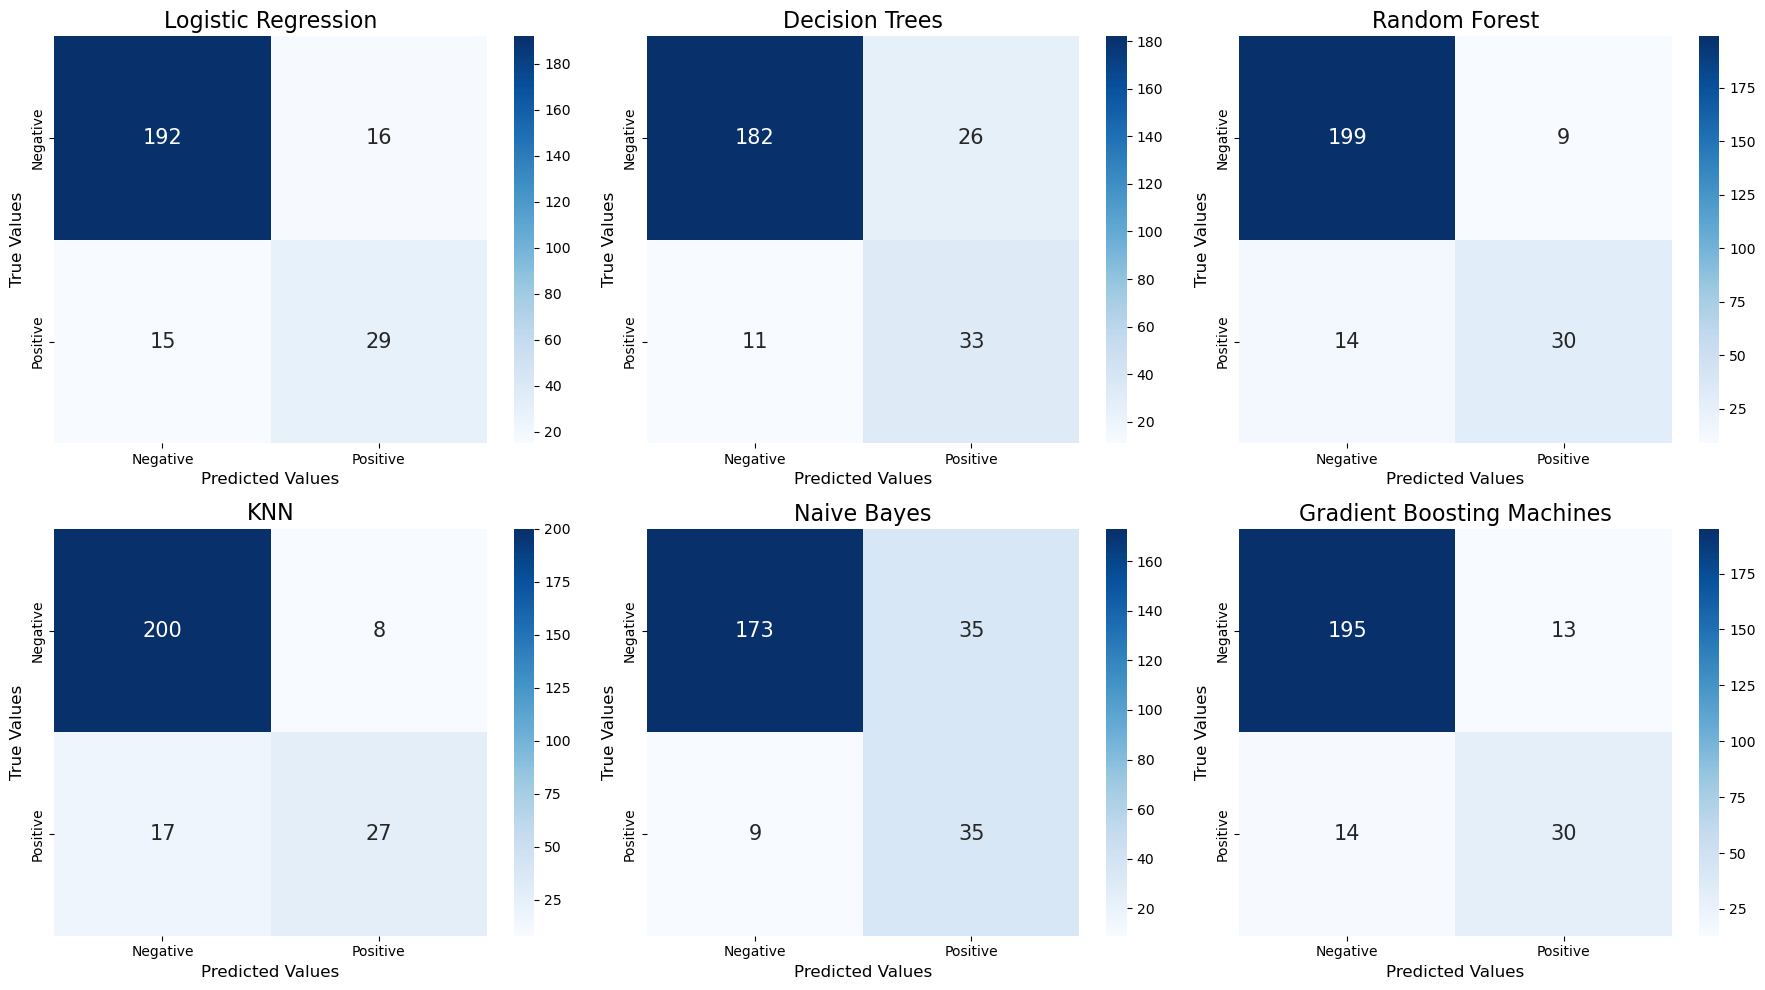

In [15]:
from sklearn.metrics import confusion_matrix
#Define function to plot confusion matrix
def plot_confusion_matrix(ax, cm, labels, title):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, annot_kws={"fontsize": 15}, ax=ax)
    ax.set_xlabel('Predicted Values', fontsize=12)
    ax.set_ylabel('True Values', fontsize=12)
    ax.set_title(title, fontsize=16)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot confusion matrix for each model
plot_confusion_matrix(axes[0, 0], logreg_cm, labels=logreg_model.classes_, title='Logistic Regression')
plot_confusion_matrix(axes[0, 1], tree_cm, labels=tree_model.classes_, title='Decision Trees')
plot_confusion_matrix(axes[0, 2], forest_cm, labels=forest_model.classes_, title='Random Forest')
plot_confusion_matrix(axes[1, 0], knn_cm, labels=knn_model.classes_, title='KNN')
plot_confusion_matrix(axes[1, 1], naive_cm, labels=naive_model.classes_, title='Naive Bayes')
plot_confusion_matrix(axes[1, 2], gbm_cm, labels=gbm_model.classes_, title='Gradient Boosting Machines')

#Labels
for ax in axes.flat:
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()